In [568]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

In [569]:
pd.set_option('display.max_rows', 600)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 2000)
pd.set_option('display.max_colwidth', 1000)

In [570]:
df= pd.read_csv("ntsb-aviation-accident-dataset.csv", sep =';',index_col=False, header=0 )

In [571]:
df.head()

,Event Id,Investigation Type,Accident Number,Event Date,Location,Country,Latitude,Longitude,Airport Code,Airport Name,Injury Severity,Aircraft Damage,Aircraft Category,Registration Number,Make,Model,Amateur Built,Number of Engines,Engine Type,FAR Description,Schedule,Purpose of Flight,Air Carrier,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase of Flight,Report Status,Publication Date,geo_point
0,20170110X14448,Accident,GAA17CA108,2016-12-31,"Casa Grande, AZ",United States,32.956389,-111.763889,CGZ,CASA GRANDE MUNI,Non-Fatal,Substantial,Airplane,N5897R,LARSON ROGER H,RV-7,Yes,1.0,Reciprocating,Part 91: General Aviation,NaN,Personal,NaN,NaN,NaN,NaN,1.0,VMC,APPROACH,Factual,NaN,"32.956389, -111.763889"
1,20161120X44929,Accident,ERA17FA052,2016-11-19,"New Gretna, NJ",United States,39.664722,-74.468056,NaN,NaN,Fatal(1),Substantial,Airplane,N4976K,RYAN,NAVION A,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Personal,NaN,1.0,NaN,NaN,NaN,VMC,NaN,Preliminary,NaN,"39.664722, -74.468056"
2,20160922X85052,Accident,GAA16CA502,2016-08-24,"St. Augustine, FL",United States,29.959167,-81.339722,SGJ,NORTHEAST FLORIDA RGNL,Non-Fatal,Substantial,Airplane,N481SL,ARION SKYS OPEN SPORT AVIATION,LIGHTNING,Yes,1.0,Reciprocating,Part 91: General Aviation,NaN,Personal,NaN,NaN,NaN,NaN,1.0,VMC,LANDING,Factual,NaN,"29.959167, -81.339722"
3,20160720X01138,Accident,CEN16LA273,2016-07-18,"Lodi, WI",United States,43.333334,-89.520834,9WN5,LODI LAKELAND,Non-Fatal,Substantial,Airplane,N393SX,BRANDT,SONEX,Yes,1.0,Reciprocating,Part 91: General Aviation,NaN,Personal,NaN,NaN,NaN,NaN,1.0,VMC,CRUISE,Factual,NaN,"43.333334, -89.520834"
4,20160104X02458,Accident,WPR16LA045,2016-01-01,"Newman Lake, WA",United States,47.822500,-117.068889,NaN,Warners Airstrip,Non-Fatal,Substantial,Airplane,N2684A,PIPER,PA18,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Personal,NaN,NaN,NaN,NaN,1.0,NaN,MANEUVERING,Preliminary,NaN,"47.8225, -117.068889"


In [572]:
df.shape

(162800, 32)

In [573]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162800 entries, 0 to 162799
Data columns (total 32 columns):
Event Id                  162800 non-null object
Investigation Type        162794 non-null object
Accident Number           162800 non-null object
Event Date                162800 non-null object
Location                  162645 non-null object
Country                   161779 non-null object
Latitude                  64916 non-null float64
Longitude                 64897 non-null float64
Airport Code              94551 non-null object
Airport Name              99099 non-null object
Injury Severity           162800 non-null object
Aircraft Damage           157211 non-null object
Aircraft Category         58862 non-null object
Registration Number       156909 non-null object
Make                      162630 non-null object
Model                     162578 non-null object
Amateur Built             161478 non-null object
Number of Engines         153847 non-null float64
Engine Ty

In [574]:
df = df.drop(['Registration Number','FAR Description', 'Accident Number', 'Airport Code', 'Airport Name', 'Total Uninjured','Report Status','Publication Date','Latitude','Longitude','Total Minor Injuries','Total Serious Injuries','Schedule','Total Fatal Injuries','Injury Severity','Amateur Built','Purpose of Flight'], axis=1)

In [575]:
df.shape

(162800, 15)

In [576]:
df=df[df['Aircraft Category'] == 'Airplane']
df = df.drop(['Aircraft Category'], axis=1)
df = df.drop(['Event Id'], axis=1)

In [577]:
df.columns

Index(['Investigation Type', 'Event Date', 'Location', 'Country', 'Aircraft Damage', 'Make', 'Model', 'Number of Engines', 'Engine Type', 'Air Carrier', 'Weather Condition', 'Broad Phase of Flight', 'geo_point'], dtype='object')

In [578]:
df.columns = ['Investigation','Date','Location','Country','Damage','Make','Model','EnginesNo','EngineType','Carrier','Weather','Phase','GeoPoint']

In [579]:
# Creating a new csv after dropping unnecessary columns
df.to_csv('out_ntsb2.csv', sep=',', encoding='utf-8')

In [580]:
#Reading new csv file
df= pd.read_csv('out_ntsb2.csv',index_col=0, header=0)
df['Date']= pd.to_datetime(df['Date'])

In [581]:
df

,Investigation,Date,Location,Country,Damage,Make,Model,EnginesNo,EngineType,Carrier,Weather,Phase,GeoPoint
0,Accident,2016-12-31,"Casa Grande, AZ",United States,Substantial,LARSON ROGER H,RV-7,1.0,Reciprocating,NaN,VMC,APPROACH,"32.956389, -111.763889"
1,Accident,2016-11-19,"New Gretna, NJ",United States,Substantial,RYAN,NAVION A,1.0,Reciprocating,NaN,VMC,NaN,"39.664722, -74.468056"
2,Accident,2016-08-24,"St. Augustine, FL",United States,Substantial,ARION SKYS OPEN SPORT AVIATION,LIGHTNING,1.0,Reciprocating,NaN,VMC,LANDING,"29.959167, -81.339722"
3,Accident,2016-07-18,"Lodi, WI",United States,Substantial,BRANDT,SONEX,1.0,Reciprocating,NaN,VMC,CRUISE,"43.333334, -89.520834"
4,Accident,2016-01-01,"Newman Lake, WA",United States,Substantial,PIPER,PA18,1.0,Reciprocating,NaN,NaN,MANEUVERING,"47.8225, -117.068889"
5,Accident,2015-12-30,"Republic, MO",United States,Destroyed,PIPER,28-140,1.0,Reciprocating,NaN,VMC,NaN,"37.138055, 93.408056"
7,Accident,2015-03-23,"Camarillo, CA",United States,Substantial,CESSNA,172S,1.0,Reciprocating,NaN,UNK,UNKNOWN,"34.209444, -119.075556"
8,Incident,2015-08-17,"Page, AZ",United States,Minor,QUEST,KODIAC 100,1.0,Turbo Prop,Arrow West Aviation (DBA: Redtail AViation),VMC,TAKEOFF,"37.024445, 111.630834"
9,Accident,2015-08-16,"Libby, MT",United States,Substantial,TAYLORCRAFT,BC12 D,NaN,Reciprocating,NaN,NaN,LANDING,"48.283889, -115.490277"
10,Accident,1982-02-09,"FORT YUKON, AK",United States,Substantial,CESSNA,185,1.0,Reciprocating,NaN,VMC,TAXI,NaN


In [582]:
df.isnull().sum()

Investigation        4
Date                 0
Location            51
Country             35
Damage            1840
Make                18
Model               62
EnginesNo         3003
EngineType        4555
Carrier          47842
Weather           3259
Phase             8761
GeoPoint         10180
dtype: int64

In [583]:
df.dropna(subset=['Carrier','EnginesNo'],how='any', inplace=True)

In [584]:
df.shape

(2513, 13)

In [585]:
df.dropna(subset=['EngineType','Model','Weather'],how='any', inplace=True)

In [586]:
df.GeoPoint.fillna('Missing',inplace=True)
df.Damage.fillna('Missing',inplace=True)
df.Country.fillna('Missing',inplace=True)
df.Location.fillna('Missing',inplace=True)
df.Phase.fillna('OTHER',inplace=True)

In [587]:
df.shape

(2189, 13)

In [588]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2189 entries, 8 to 162796
Data columns (total 13 columns):
Investigation    2189 non-null object
Date             2189 non-null datetime64[ns]
Location         2189 non-null object
Country          2189 non-null object
Damage           2189 non-null object
Make             2189 non-null object
Model            2189 non-null object
EnginesNo        2189 non-null float64
EngineType       2189 non-null object
Carrier          2189 non-null object
Weather          2189 non-null object
Phase            2189 non-null object
GeoPoint         2189 non-null object
dtypes: datetime64[ns](1), float64(1), object(11)
memory usage: 239.4+ KB


In [589]:
df.EnginesNo  = df.EnginesNo.astype(int)

In [590]:
df['Make_Model']=df.Make+'_'+df.Model

In [591]:
df.Model.value_counts()

208B                  89
PA-31-350             46
207A                  33
207                   33
CL-600-2B19           30
737 7H4               30
208                   30
U206G                 30
58                    24
DHC-2                 21
185                   20
PA-32                 20
402C                  20
PA-32-300             20
737                   18
EMB-145LR             18
737-7H4               16
1900C                 16
310R                  16
747                   16
402B                  14
99                    14
402                   14
A36                   14
206                   14
PA31                  12
SA227-AC              12
CL-600-2C10           12
DHC-8-402             12
PA-32-301             12
U206F                 12
200                   11
A321 231              11
E18S                  10
717-200               10
172                   10
A330-323              10
560XL                 10
737-3H4               10
737 3H4               10


In [592]:
df.Model=df.Model.apply(lambda x :x.replace(' ','_'))
df.Model=df.Model.apply(lambda x :x.replace('-','_'))
df.Model=df.Model.apply(lambda x: x.strip())

In [593]:
df['Model'].replace('707.*', '707', regex=True, inplace=True)
df['Model'].replace('717.*', '717', regex=True, inplace=True)
df['Model'].replace('727.*', '727', regex=True, inplace=True)
df['Model'].replace('B_727.*', '727', regex=True, inplace=True)
df['Model'].replace('737.*', '737', regex=True, inplace=True)
df['Model'].replace('B737.*', '737', regex=True, inplace=True)
df['Model'].replace('747.*', '747', regex=True, inplace=True)
df['Model'].replace('757.*', '757', regex=True, inplace=True)
df['Model'].replace('767.*', '767', regex=True, inplace=True)
df['Model'].replace('777.*', '777', regex=True, inplace=True)
df['Model'].replace('BOEING_777.*', '777', regex=True, inplace=True)
df['Model'].replace('787.*', '787', regex=True, inplace=True)

In [594]:
df['Model'].replace('207.*', '207', regex=True, inplace=True)
df['Model'].replace('208.*', '208', regex=True, inplace=True)

In [595]:
df['Model'].replace('A_319.*', 'A319', regex=True, inplace=True)
df['Model'].replace('A319.*', 'A319', regex=True, inplace=True)
df['Model'].replace('A320.*', 'A320', regex=True, inplace=True)
df['Model'].replace('A321.*', 'A321', regex=True, inplace=True)
df['Model'].replace('A330.*', 'A330', regex=True, inplace=True)

In [596]:
df['Model'].replace('172.*', '172', regex=True, inplace=True)
df['Model'].replace('402.*', '402', regex=True, inplace=True)
df['Model'].replace('TU206.*', 'TU206', regex=True, inplace=True)

In [597]:
df['Model'].replace('DC_10.*', 'DC-10', regex=True, inplace=True)
df['Model'].replace('PA_32.*', 'PA-32', regex=True, inplace=True)
df['Model'].replace('MD_88.*', 'MD88', regex=True, inplace=True)
df['Model'].replace('MD_88.*', 'MD88', regex=True, inplace=True)
df['Model'].replace('EMB.*', 'EMB_145', regex=True, inplace=True)
df['Model'].replace('PA_31.*', 'PA_31', regex=True, inplace=True)
df['Model'].replace('PA31.*', 'PA_31', regex=True, inplace=True)

In [598]:
#'Model' column cleaning done!
df.Model.value_counts()

737                   172
208                   121
PA_31                  95
PA-32                  82
EMB_145                68
207                    66
402                    52
757                    45
A320                   43
767                    38
A319                   36
747                    36
CL_600_2B19            34
172                    32
U206G                  30
777                    26
DHC_2                  24
58                     24
MD88                   20
185                    20
727                    20
A330                   18
CL_600_2C10            18
H_295                  18
DC-10                  16
310R                   16
DHC_8_402              16
1900C                  16
A321                   15
SA227_AC               14
99                     14
206                    14
T207                   14
A36                    14
BEAVER_DHC_2           13
CL600_2D24             13
C_99                   13
U206F                  12
200         

In [599]:
#'Make' column cleaning!
df.Make.value_counts()

CESSNA                            504
BOEING                            341
PIPER                             240
BEECH                             159
EMBRAER                            89
AIRBUS                             79
DEHAVILLAND                        71
BOMBARDIER INC                     68
MCDONNELL DOUGLAS                  58
Cessna                             50
DOUGLAS                            37
SWEARINGEN                         33
BOMBARDIER                         30
AIRBUS INDUSTRIE                   27
de Havilland                       26
FAIRCHILD                          21
HELIO                              20
Boeing                             18
Airbus Industrie                   16
Beech                              16
AERO COMMANDER                     14
Bombardier, Inc.                   10
LOCKHEED                            8
BRITTEN-NORMAN                      8
GRUMMAN                             8
EMBRAER-EMPRESA BRASILEIRA DE       8
PILATUS AIRC

In [600]:
df.Make=df.Make.str.capitalize()

In [601]:
df.Make.value_counts()

Cessna                            554
Boeing                            359
Piper                             246
Beech                             175
Embraer                            91
Airbus                             83
Dehavilland                        73
Bombardier inc                     68
Mcdonnell douglas                  62
Airbus industrie                   43
Douglas                            37
Bombardier                         34
Swearingen                         33
De havilland                       32
Fairchild                          23
Helio                              20
Aero commander                     16
Britten-norman                     10
Bombardier, inc.                   10
Learjet                             8
Grumman                             8
British aerospace                   8
Lockheed                            8
Embraer-empresa brasileira de       8
Raytheon aircraft company           8
Pilatus aircraft ltd                7
Eclipse avia

In [602]:
df['Make'].replace('Cessna.*', 'Cessna', regex=True, inplace=True)
df['Make'].replace('Boeing.*', 'Boeing', regex=True, inplace=True)
df['Make'].replace('Airbus.*', 'Airbus', regex=True, inplace=True)
df['Make'].replace('Rockwell.*', 'Rockwell', regex=True, inplace=True)
df['Make'].replace('Mcdonn.*', 'Mcdonnell', regex=True, inplace=True)
df['Make'].replace('Gulfstream.*', 'Gulfstream', regex=True, inplace=True)
df['Make'].replace('Bombardier.*', 'Bombardier', regex=True, inplace=True)
df['Make'].replace('Embraer.*', 'Embraer', regex=True, inplace=True)
df['Make'].replace('Douglas.*', 'Mcdonnell', regex=True, inplace=True)
df['Make'].replace('Mcdonald.*', 'Mcdonnell', regex=True, inplace=True)
df['Make'].replace('Saab.*', 'Saab', regex=True, inplace=True)
df['Make'].replace('Dassault.*', 'Dassault', regex=True, inplace=True)
df['Make'].replace('Quest.*', 'Quest', regex=True, inplace=True)

In [603]:
df.Make.value_counts()

Cessna                            554
Boeing                            365
Piper                             246
Beech                             175
Airbus                            126
Mcdonnell                         115
Bombardier                        114
Embraer                           105
Dehavilland                        73
Swearingen                         33
De havilland                       32
Fairchild                          23
Helio                              20
Aero commander                     16
Quest                              10
Saab                               10
Britten-norman                     10
British aerospace                   8
Lockheed                            8
Gulfstream                          8
Grumman                             8
Learjet                             8
Raytheon aircraft company           8
Pilatus aircraft ltd                7
Learjet inc                         6
Eclipse aviation corp               6
Gates learje

In [604]:
df.Make=df.Make.apply(lambda x :x.replace(' ','_'))
df.Make=df.Make.apply(lambda x :x.replace('-','_'))
df.Make=df.Make.apply(lambda x: x.strip())

In [605]:
#'Make' column cleaning done!
df.Make.value_counts()

Cessna                            554
Boeing                            365
Piper                             246
Beech                             175
Airbus                            126
Mcdonnell                         115
Bombardier                        114
Embraer                           105
Dehavilland                        73
Swearingen                         33
De_havilland                       32
Fairchild                          23
Helio                              20
Aero_commander                     16
Britten_norman                     10
Saab                               10
Quest                              10
Lockheed                            8
Raytheon_aircraft_company           8
Gulfstream                          8
Grumman                             8
British_aerospace                   8
Learjet                             8
Pilatus_aircraft_ltd                7
Eclipse_aviation_corp               6
Learjet_inc                         6
Gates_learje

In [606]:
#'Carrier' column cleaning!
df.Carrier.value_counts()

SOUTHWEST AIRLINES CO                                                                   66
DELTA AIR LINES INC                                                                     41
Delta Air Lines                                                                         27
Southwest Airlines                                                                      27
AMERICAN AIRLINES INC                                                                   26
American Airlines                                                                       24
US AIRWAYS INC                                                                          20
UNITED AIR LINES INC                                                                    16
TALKEETNA AIR TAXI INC                                                                  13
United Airlines                                                                         12
SKYWEST AIRLINES INC                                                                    11

In [607]:
df['Carrier']=df['Carrier'].str.capitalize()

In [608]:
df.Carrier=df.Carrier.apply(lambda x :x.replace(' ','_'))
df.Carrier=df.Carrier.apply(lambda x :x.replace('-','_'))
df.Carrier=df.Carrier.apply(lambda x: x.strip())

In [609]:
df['Carrier'].replace('Delta.*', 'Delta_Airlines', regex=True, inplace=True)
df['Carrier'].replace('American.*', 'American_Airlines', regex=True, inplace=True)
df['Carrier'].replace('Continental.*', 'Continental_Airlines', regex=True, inplace=True)
df['Carrier'].replace('United.*', 'United_Airlines', regex=True, inplace=True)
df['Carrier'].replace('Southwest.*', 'Southwest_Airlines', regex=True, inplace=True)
df['Carrier'].replace('Skywest.*', 'Skywest_Airlines', regex=True, inplace=True)
df['Carrier'].replace('Us.*', 'US_Airways', regex=True, inplace=True)
df['Carrier'].replace('Frontier.*', 'Frontier_Airlines', regex=True, inplace=True)
df['Carrier'].replace('Ameriflight.*', 'Ameriflight_Airlines', regex=True, inplace=True)
df['Carrier'].replace('China.*', 'China_Airlines', regex=True, inplace=True)
df['Carrier'].replace('Netjets.*', 'Netjets_Airlines', regex=True, inplace=True)
df['Carrier'].replace('Southern_seaplanes.*', 'Southern_Seaplanes', regex=True, inplace=True)
df['Carrier'].replace('Northwest.*', 'Northwest_Airlines', regex=True, inplace=True)
df['Carrier'].replace('Mesa.*', 'Mesa_Airlines', regex=True, inplace=True)
df['Carrier'].replace('Aero_charter.*', 'Aero_Charter', regex=True, inplace=True)
df['Carrier'].replace('Air_charter.*', 'Air_Charter', regex=True, inplace=True)
df['Carrier'].replace('Air_continental.*', 'Air_Continental', regex=True, inplace=True)
df['Carrier'].replace('Baron.*', 'Baron_Aviation', regex=True, inplace=True)
df['Carrier'].replace('Bemidji.*', 'Bemidji_Aviation', regex=True, inplace=True)
df['Carrier'].replace('Atlantic_southeast.*', 'Atlantic_Southeast', regex=True, inplace=True)
df['Carrier'].replace('Brit.*', 'British_Airlines', regex=True, inplace=True)
df['Carrier'].replace('Central_air_southwest.*', 'Central_Air_Southwest', regex=True, inplace=True)

df['Carrier'].replace('Federal_express.*', 'Fedex_express', regex=True, inplace=True)
df['Carrier'].replace('Great_lakes.*', 'Great_Lakes', regex=True, inplace=True)
df['Carrier'].replace('Martinaire_aviation.*', 'Martinaire_Aviation', regex=True, inplace=True)

df['Carrier'].replace('Peninsula_airways.*', 'Peninsula_Airways', regex=True, inplace=True)
df['Carrier'].replace('Psa.*', 'PSA_Airlines', regex=True, inplace=True)
df['Carrier'].replace('Republic.*', 'Republic_Airlines', regex=True, inplace=True)
df['Carrier'].replace('U.s._.*', 'US_Airways', regex=True, inplace=True)


In [610]:
#'Carrier' column cleaning done!
df.Carrier.value_counts()

Delta_Airlines                                                                          108
Southwest_Airlines                                                                      106
American_Airlines                                                                        91
United_Airlines                                                                          64
US_Airways                                                                               36
Mesa_Airlines                                                                            31
Ameriflight_Airlines                                                                     31
Skywest_Airlines                                                                         27
Republic_Airlines                                                                        26
Fedex_express                                                                            22
Frontier_Airlines                                                               

In [611]:
df

,Investigation,Date,Location,Country,Damage,Make,Model,EnginesNo,EngineType,Carrier,Weather,Phase,GeoPoint,Make_Model
8,Incident,2015-08-17,"Page, AZ",United States,Minor,Quest,KODIAC_100,1,Turbo Prop,Arrow_west_aviation_(dba:_redtail_aviation),VMC,TAKEOFF,"37.024445, 111.630834",QUEST_KODIAC 100
820,Accident,2016-08-27,"Pascagoula, FL",United States,Substantial,Boeing,737,2,Turbo Fan,Southwest_Airlines,VMC,OTHER,Missing,BOEING_737-700
1013,Accident,2017-04-28,"Amarillo, TX",United States,Destroyed,Pilatus_aircraft_ltd,PC_12,1,Turbo Prop,Rico_aviation_llc,IMC,TAKEOFF,"35.196389, -101.704722",PILATUS AIRCRAFT LTD_PC 12
1342,Accident,2018-06-15,"Kotzebue, AK",United States,Substantial,Cessna,180K,1,Reciprocating,Airframe_innovations_inc,VMC,TAKEOFF,"66.135, -160.2575",CESSNA_180K
1376,Accident,2013-08-14,"Birmingham, AL",United States,Destroyed,Airbus,A300___F4_622R,2,Turbo Fan,United_Airlines,UNK,APPROACH,"33.563889, -86.802222",AIRBUS_A300 - F4 622R
1388,Accident,2013-06-14,"Salmon, ID",United States,Substantial,Cessna,T210N,1,Reciprocating,Scott_patrick_(dba:_sp_aircraft),VMC,LANDING,"44.967778, -114.732778",CESSNA_T210N
1503,Accident,2014-11-18,"Chicago, IL",United States,Substantial,Aero_commander,500_B,2,Reciprocating,Central_airlines_inc._(dba:_central_air_southwest),VMC,OTHER,"41.774445, 87.738055",AERO COMMANDER_500 B
1504,Accident,2014-08-27,"Las Cruces, NM",United States,Destroyed,Cessna,421C,2,Reciprocating,Amigos_aviation_inc_(dba:_amigos_aviation_inc),VMC,STANDING,"32.255833, -106.982223",CESSNA_421C
1787,Accident,2017-09-16,"Sedona, AZ",United States,Substantial,Cessna,208,2,Turbo Prop,Westwind_aviation_inc,VMC,TAXI,"34.849166, -111.790555",CESSNA_208B
1789,Accident,2017-07-03,"El Paso, TX",United States,Substantial,Beech,A36,1,Reciprocating,"Gta_air,_inc.",VMC,CLIMB,"31.812222, -106.382778",BEECH_A36


In [612]:
df['Make_Model']=df.Make+'_'+df.Model

In [613]:
#'EngineType' column cleaning!
df.EngineType.value_counts()

Reciprocating    867
Turbo Fan        738
Turbo Prop       475
Turbo Jet        105
Unknown            4
Name: EngineType, dtype: int64

In [614]:
df.EngineType=df.EngineType.apply(lambda x :x.replace(' ','_'))
df.EngineType=df.EngineType.apply(lambda x :x.replace('-','_'))
df.EngineType=df.EngineType.apply(lambda x: x.strip())

In [615]:
#'EngineType' column cleaning done!
df.EngineType.value_counts()

Reciprocating    867
Turbo_Fan        738
Turbo_Prop       475
Turbo_Jet        105
Unknown            4
Name: EngineType, dtype: int64

In [616]:
#'Phase' column cleaning!
df.Phase.value_counts()

LANDING        447
TAKEOFF        405
OTHER          276
TAXI           236
APPROACH       234
CRUISE         138
STANDING       134
DESCENT        134
CLIMB          108
MANEUVERING     41
GO-AROUND       28
UNKNOWN          8
Name: Phase, dtype: int64

In [617]:
df.Phase=df.Phase.str.capitalize()
df.Phase=df.Phase.apply(lambda x :x.replace(' ','_'))
df.Phase=df.Phase.apply(lambda x :x.replace('-','_'))
df.Phase=df.Phase.apply(lambda x: x.strip())

In [618]:
#'Phase' column cleaning done!
df.Phase.value_counts()

Landing        447
Takeoff        405
Other          276
Taxi           236
Approach       234
Cruise         138
Descent        134
Standing       134
Climb          108
Maneuvering     41
Go_around       28
Unknown          8
Name: Phase, dtype: int64

In [619]:
df.columns

Index(['Investigation', 'Date', 'Location', 'Country', 'Damage', 'Make', 'Model', 'EnginesNo', 'EngineType', 'Carrier', 'Weather', 'Phase', 'GeoPoint', 'Make_Model'], dtype='object')

In [620]:
#'Location' column cleaning!
df.Location.value_counts()

Chicago, IL                                  51
Atlanta, GA                                  44
New York, NY                                 29
Minneapolis, MN                              23
Anchorage, AK                                22
Salt Lake City, UT                           21
Bethel, AK                                   20
Denver, CO                                   20
Ketchikan, AK                                20
Miami, FL                                    19
Los Angeles, CA                              19
Las Vegas, NV                                19
Phoenix, AZ                                  18
Houston, TX                                  18
Talkeetna, AK                                18
Dallas, TX                                   18
Fort Lauderdale, FL                          16
Charlotte, NC                                15
St. Louis, MO                                14
Kansas City, MO                              14
DENVER, CO                              

In [621]:
df.Location=df.Location.apply(lambda x :x.replace(',','_'))

df.Location=df.Location.apply(lambda x: x.strip())
df.Location=df.Location.apply(lambda x :x.replace(' ',''))


In [622]:
#'Location' column cleaning done!
df.Location.value_counts()

Chicago_IL                              51
Atlanta_GA                              44
NewYork_NY                              29
Minneapolis_MN                          23
Anchorage_AK                            22
SaltLakeCity_UT                         21
Ketchikan_AK                            20
Denver_CO                               20
Bethel_AK                               20
LosAngeles_CA                           19
LasVegas_NV                             19
Miami_FL                                19
Talkeetna_AK                            18
Dallas_TX                               18
Houston_TX                              18
Phoenix_AZ                              18
FortLauderdale_FL                       16
Charlotte_NC                            15
St.Louis_MO                             14
DENVER_CO                               14
KansasCity_MO                           14
Baltimore_MD                            13
Homer_AK                                13
Albuquerque

In [623]:
#'Location' column cleaning!
df.Country.value_counts()

United States         2134
Japan                   10
Missing                  8
Afghanistan              6
Unknown                  4
Bahamas                  3
American Samoa           2
Argentina                2
Iceland                  2
China                    2
Haiti                    2
Cuba                     2
Colombia                 2
Bermuda                  2
Dominican Republic       2
Turkey                   2
Yemen                    2
France                   2
Name: Country, dtype: int64

In [624]:
df['Country'].replace('United.*', 'US', regex=True, inplace=True)
df.Country=df.Country.apply(lambda x :x.replace(' ','_'))
df.Country=df.Country.apply(lambda x: x.strip())

In [625]:
#'Location' column cleaning done!
df.Country.value_counts()

US                    2134
Japan                   10
Missing                  8
Afghanistan              6
Unknown                  4
Bahamas                  3
Cuba                     2
Argentina                2
Iceland                  2
China                    2
Dominican_Republic       2
Haiti                    2
American_Samoa           2
Bermuda                  2
Turkey                   2
Yemen                    2
Colombia                 2
France                   2
Name: Country, dtype: int64

In [688]:
df.isnull().sum()

Investigation    0
Date             0
Location         0
Country          0
Damage           0
Make             0
Model            0
EnginesNo        0
EngineType       0
Carrier          0
Weather          0
Phase            0
GeoPoint         0
Make_Model       0
dtype: int64

In [626]:
# Creating a new csv file after cleaning
df.to_csv('clean_ntsb2.csv', sep=',', encoding='utf-8')

In [627]:
df= pd.read_csv('clean_ntsb2.csv',index_col=0, header=0)
df['Date']= pd.to_datetime(df['Date'])

In [628]:
df

,Investigation,Date,Location,Country,Damage,Make,Model,EnginesNo,EngineType,Carrier,Weather,Phase,GeoPoint,Make_Model
8,Incident,2015-08-17,Page_AZ,US,Minor,Quest,KODIAC_100,1,Turbo_Prop,Arrow_west_aviation_(dba:_redtail_aviation),VMC,Takeoff,"37.024445, 111.630834",Quest_KODIAC_100
820,Accident,2016-08-27,Pascagoula_FL,US,Substantial,Boeing,737,2,Turbo_Fan,Southwest_Airlines,VMC,Other,Missing,Boeing_737
1013,Accident,2017-04-28,Amarillo_TX,US,Destroyed,Pilatus_aircraft_ltd,PC_12,1,Turbo_Prop,Rico_aviation_llc,IMC,Takeoff,"35.196389, -101.704722",Pilatus_aircraft_ltd_PC_12
1342,Accident,2018-06-15,Kotzebue_AK,US,Substantial,Cessna,180K,1,Reciprocating,Airframe_innovations_inc,VMC,Takeoff,"66.135, -160.2575",Cessna_180K
1376,Accident,2013-08-14,Birmingham_AL,US,Destroyed,Airbus,A300___F4_622R,2,Turbo_Fan,United_Airlines,UNK,Approach,"33.563889, -86.802222",Airbus_A300___F4_622R
1388,Accident,2013-06-14,Salmon_ID,US,Substantial,Cessna,T210N,1,Reciprocating,Scott_patrick_(dba:_sp_aircraft),VMC,Landing,"44.967778, -114.732778",Cessna_T210N
1503,Accident,2014-11-18,Chicago_IL,US,Substantial,Aero_commander,500_B,2,Reciprocating,Central_airlines_inc._(dba:_central_air_southwest),VMC,Other,"41.774445, 87.738055",Aero_commander_500_B
1504,Accident,2014-08-27,LasCruces_NM,US,Destroyed,Cessna,421C,2,Reciprocating,Amigos_aviation_inc_(dba:_amigos_aviation_inc),VMC,Standing,"32.255833, -106.982223",Cessna_421C
1787,Accident,2017-09-16,Sedona_AZ,US,Substantial,Cessna,208,2,Turbo_Prop,Westwind_aviation_inc,VMC,Taxi,"34.849166, -111.790555",Cessna_208
1789,Accident,2017-07-03,ElPaso_TX,US,Substantial,Beech,A36,1,Reciprocating,"Gta_air,_inc.",VMC,Climb,"31.812222, -106.382778",Beech_A36


## Under which meteorological conditions accidents occur most?

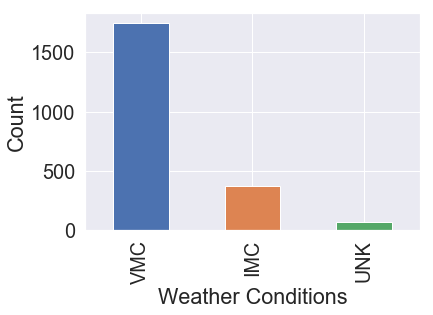

In [673]:
pd.value_counts(df['Weather']).plot.bar()
plt.xlabel('Weather Conditions')
plt.ylabel('Count')
plt.show()

Accidents occured in Visual Meteorological Conditions more than the Instrument Meteorological Conditions. IFR flights relies on aircraft instruments. In VMC, visual references are used by the pilots as primary reference. Technological developments in aviation instruments can effect the safety and accuracy of the flight under IFR conditions.

## At which phase of flight crashes occur most?

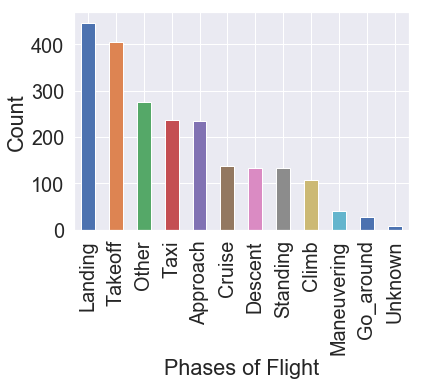

In [678]:
pd.value_counts(df['Phase']).plot.bar()
plt.xlabel('Phases of Flight')
plt.ylabel('Count')
plt.show()

## Which make has the highest number of accidents?

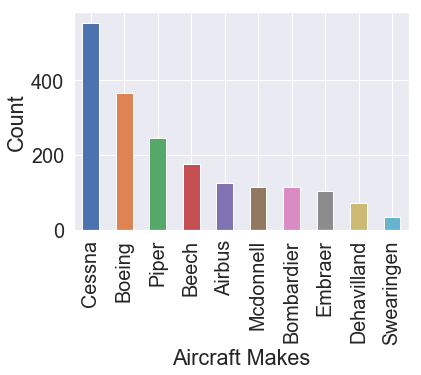

In [679]:
df['Make'].value_counts(ascending=False)[:10].plot.bar()
plt.xlabel('Aircraft Makes')
plt.ylabel('Count')
plt.show()

## Which type of aircraft has highest number of accidents?

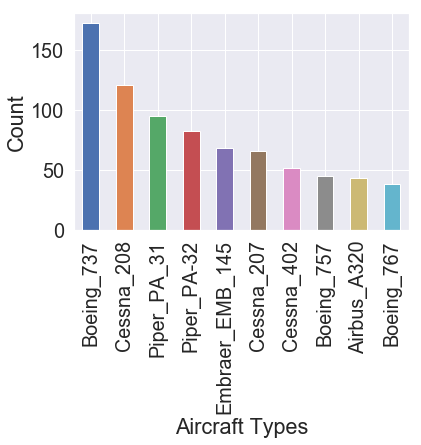

In [680]:
df.Make_Model.value_counts(ascending=False)[:10].plot.bar()
plt.xlabel('Aircraft Types')
plt.ylabel('Count')
plt.show()

## Is there a relation between number of engines and accidents?

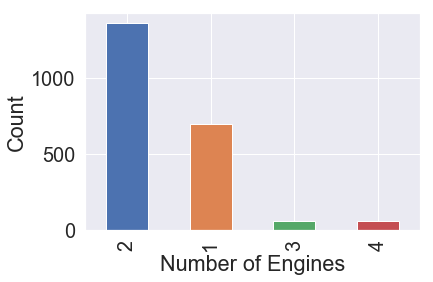

In [681]:
df['EnginesNo'].value_counts().plot.bar()
plt.xlabel('Number of Engines')
plt.ylabel('Count')
plt.show()

## Which carrier has highest number of accidents?

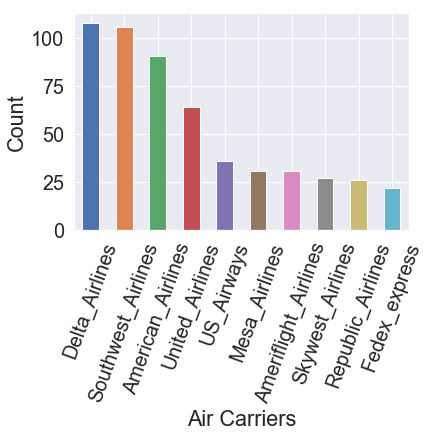

In [683]:
df['Carrier'].value_counts()[:10].plot.bar()
plt.xlabel('Air Carriers')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.show()

## Is number of accidents decreasing over time?

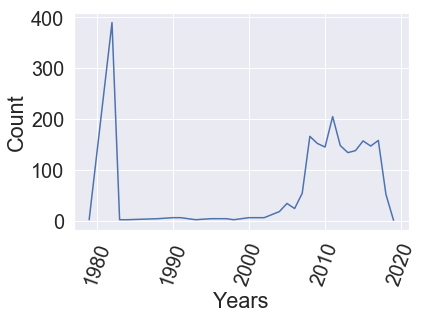

In [687]:
df['Date'].dt.year.value_counts().sort_index().plot()
plt.xlabel('Years')
plt.xticks(rotation=70)
plt.ylabel('Count')
plt.show()

Decreased number of accicent between 1982 and 2004 might be the result of applied new practises after huge number of accidents.

In [636]:
pd.crosstab(index=df['Weather'],columns=df['Investigation'])

Investigation,Accident,Incident
Weather,,
IMC,323,53
UNK,33,33
VMC,1442,305


In [637]:
pd.crosstab(index=df['EnginesNo'],columns=df['Investigation'])

Investigation,Accident,Incident
EnginesNo,,
1,682,17
2,1042,320
3,34,30
4,40,24


In [638]:
pd.crosstab(index=df['Damage'],columns=df['Investigation'])

Investigation,Accident,Incident
Damage,,
Destroyed,201,0
Minor,65,264
Missing,272,127
Substantial,1260,0


# The Null and Alternate Hypotheses


### H0:There is no statistically significant relationship between weather conditions and investigation type.

### Ha:There is a statistically significant relationship between weather conditions and investigation type.

#### Constructing the Contingency Table

In [639]:
contingency_table = pd.crosstab(
    
    df['Investigation'],
    df['Weather'],
    margins = True
)
contingency_table #.iloc[1:][:1]

Weather,IMC,UNK,VMC,All
Investigation,,,,
Accident,323,33,1442,1798
Incident,53,33,305,391
All,376,66,1747,2189


Each cell in this table represents a frequency count.

### Visualizing the Contingency Table with a Stacked Bar Chart

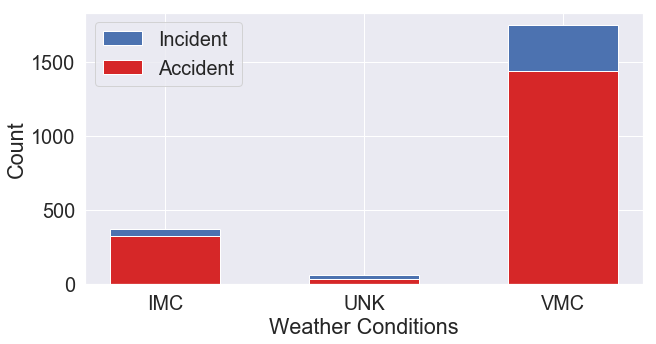

In [640]:
#Assigns the frequency values
Accident = contingency_table.iloc[0][0:3].values
Incident = contingency_table.iloc[1][0:3].values
#Plots the bar chart
fig = plt.figure(figsize=(10, 5))
sns.set(font_scale=1.8)
categories = ['IMC','UNK','VMC']

p1 = plt.bar(categories, Accident, 0.55, color='#d62728')
p2 = plt.bar(categories, Incident, 0.55,bottom=Accident)
plt.legend((p2[0], p1[0]), ('Incident','Accident'))
plt.xlabel('Weather Conditions')
plt.ylabel('Count')
plt.show()

### The Chi-Squared Test for Independence - Calculation with Numpy

In order to determine whether we accept or reject the null hypothesis. We have to compute p-value similar to the welch's t-test and ANOVA. For testing with two categorical variables, we will use the Chi-squared test.

X2=(observed−expected)**2 / (expected)

#### First, let's put the observed values into a one dimensional array, reading the contingency table from left to right then top to bottom.

In [641]:
f_obs = np.append(contingency_table.iloc[0][0:3].values, contingency_table.iloc[1][0:3].values)
f_obs

array([ 323,   33, 1442,   53,   33,  305], dtype=int64)

#### Next, we need to calculate the expected values. The expected values assume that null hypothesis is true. We would need to calculate values if there is an equal percentage of accidents and incidents for each category. For example, this is how we would calculate the expected value for the top left cell:

Expected # of Accidents in the VFR category = Total # of Accidents ∗ Number of Investigations in the VFR / total # of Investigations

In [642]:
row_sums = contingency_table.iloc[0:2,3].values
row_sums

array([1798,  391], dtype=int64)

In [643]:
col_sums = contingency_table.iloc[2,0:3].values
col_sums

array([ 376,   66, 1747], dtype=int64)

In [644]:
total = contingency_table.loc['All', 'All']

f_expected = []
for j in range(2):
    for i in col_sums:
        f_expected.append(i*row_sums[j]/total)
f_expected

[308.83873915029693,
 54.21105527638191,
 1434.9502055733212,
 67.16126084970305,
 11.78894472361809,
 312.04979442667883]

#### Now that we have all our observed and expected values, we can just plug everything into the Chi-squared test formula.

In [645]:
chi_squared_statistic = ((f_obs - f_expected)**2/f_expected).sum()
print('Chi-squared Statistic: {}'.format(chi_squared_statistic))

Chi-squared Statistic: 50.292043937865685


### Degrees of Freedom

Similar to the Welch's t-test, we would have to calculate the degrees of freedom before we can determine the p-value.

DoF=(Number of rows−1)∗(Number of columns−1)

In [646]:
dof = (len(row_sums)-1)*(len(col_sums)-1)
print("Degrees of Freedom: {}".format(dof))

Degrees of Freedom: 2


#### Now we are ready to look into the Chi-squared distribution table. Our x2 statistic was so large that the p-value is approximately zero. So we have evidence against the null hypothesis.

### The Chi-Squared Test for Independence - Using Scipy

#### All we need to do is format the observed values into a two-dimensional array and plug it into the function.

In [647]:
f_obs = np.array([contingency_table.iloc[0][0:3].values,
                  contingency_table.iloc[1][0:3].values])
f_obs

array([[ 323,   33, 1442],
       [  53,   33,  305]], dtype=int64)

In [648]:
from scipy import stats
stats.chi2_contingency(f_obs)[0:3]

(50.292043937865685, 1.2001110017828439e-11, 2)

#### The results were exactly the same as our calculations with Numpy. 
The X**2 = ~49, p-value = ~0 and degrees of freedom = 2.

## Conclusion
### With a p-value < 0.05 , we can reject the null hypothesis. There is definitely some sort of relationship between Accident and the Incident column. We don't know what this relationship is, but we do know that these two variables are not independent of each other.


In [649]:
import warnings
import os
warnings.filterwarnings('ignore')
import copy
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re 
from statsmodels.graphics.mosaicplot import mosaic
import scipy.stats as scs
import sklearn
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.metrics import recall_score
from sklearn.preprocessing import Imputer, Binarizer
from sklearn.cross_validation import cross_val_score
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import StratifiedKFold, KFold
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
from sklearn.feature_extraction import FeatureHasher
from sklearn import preprocessing
%matplotlib inline

## Categorical Data

In [650]:
df.nunique()

Investigation      2
Date             866
Location         607
Country           18
Damage             4
Make              60
Model            296
EnginesNo          4
EngineType         5
Carrier          625
Weather            3
Phase             12
GeoPoint         671
Make_Model       319
dtype: int64

In [662]:
#Converting all columns to numerical values
le = preprocessing.LabelEncoder()
a=[]
a=df.columns
df_num=pd.DataFrame()

for i in range(len(df.columns)):
    a=df.columns[i]
    le.fit(df[a])
    df_num[a]= le.transform(df[a])

In [653]:
df_num.head()

,Investigation,Date,Location,Country,Damage,Make,Model,EnginesNo,EngineType,Carrier,Weather,Phase,GeoPoint,Make_Model
0,1,729,437,15,1,46,216,0,3,96,2,9,217,286
1,0,776,440,15,3,7,71,1,1,537,2,7,670,54
2,0,808,22,15,0,44,256,0,3,490,0,9,182,262
3,0,859,286,15,3,14,7,0,0,46,2,9,658,98
4,0,613,59,15,0,2,83,1,1,579,1,0,131,7


# Logistic Resression Algoritm

In [663]:
X=df_num.drop(['Investigation'],axis=1)
y=df_num.Investigation

In [672]:
X_train, X_test, y_train, y_test = train_test_split \
(X, y, test_size=0.2, random_state=42)

In [665]:
lr=LogisticRegression()

In [666]:
print('cross val score: ',cross_val_score(lr,X,y,cv=5))

cross val score:  [0.79726651 0.81506849 0.79908676 0.82837529 0.81464531]


In [667]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [668]:
y_pred=lr.predict(X_test)

In [669]:
# Evaluation
print('accuracy score: ',accuracy_score(y_test,y_pred))
#print('recall_score macro : ',recall_score(y_test, y_pred, average='macro')  )
#print('recall_score micro : ',recall_score(y_test, y_pred, average='micro')  )
print('recall_score weighted : ',recall_score(y_test, y_pred, average='weighted')  )
print('recall_score  : ',recall_score(y_test, y_pred, average=None))

accuracy score:  0.8264840182648402
recall_score weighted :  0.8264840182648402
recall_score  :  [0.93351801 0.32467532]


In [670]:
print('confusion matrix: \n',confusion_matrix(y_test, y_pred))
# area under curve
print (classification_report(y_test, y_pred))

confusion matrix: 
 [[337  24]
 [ 52  25]]
             precision    recall  f1-score   support

          0       0.87      0.93      0.90       361
          1       0.51      0.32      0.40        77

avg / total       0.80      0.83      0.81       438

